<a href="https://colab.research.google.com/github/Sarupade/Titanic-EDA-and-Data-Cleaning1-/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Data Cleaning & Exploratory Data Analysis (EDA) on the Titaninc Datase
We have to perform data cleaning and EDA using the Titanic dataset from Kaggle. This will invlove:
1.Loading the dataset
2.Handling missing avles
3.Exploring realtionships etween variables
4.Visualizing trebds
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# load the Titanic dataset
df=pd.read_csv("train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  



Data Cleaning

In [ ]:


print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Handling Missing Values
Fill Age with median

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-5-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


Fill Embarked with the most frequent value:

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-6-4a47dd7a9b9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


Drop Cabin column (too many missing values)

In [ ]:
df.drop(columns=['Cabin'],inplace=True)

1.Survival Rate by Gender

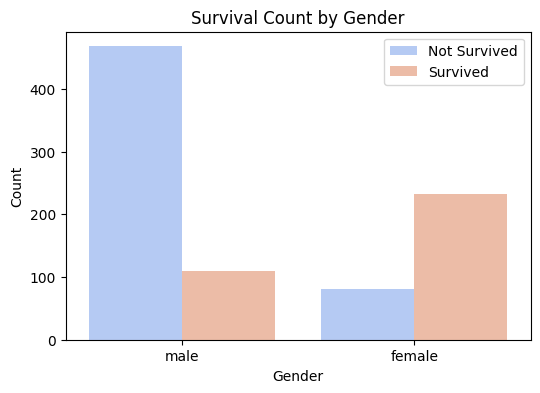

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex',hue='Survived',data=df,palette='coolwarm')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived','Survived'])
plt.show()
#observation
#Females had a higher survival rate than males

2. Age Distribution of Passengers

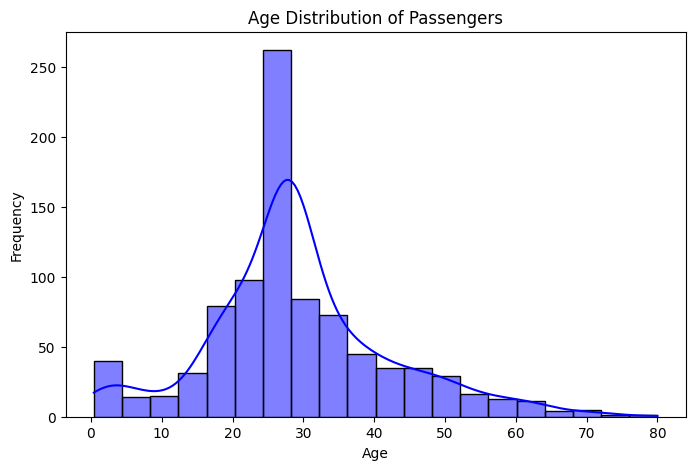

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=20,kde=True,color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#observation:
#Most passengers were between 20-40 years old.

3.Survival Rate by Passenger Class

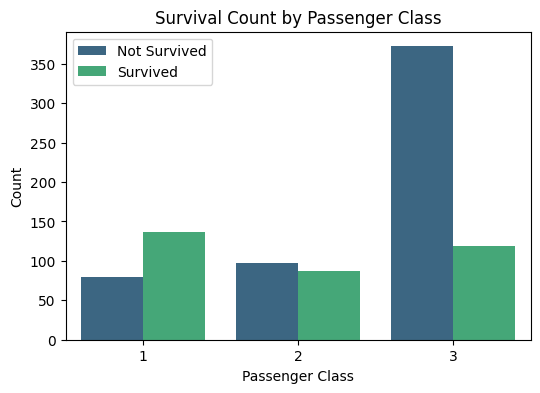

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',hue='Survived',data=df,palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived','Survived'])
plt.show()
#Observation:
#First class passengers had a higher survival rate

Fare Distribution by class

<ipython-input-13-896e792cf21a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Fare',data=df,palette='pastel')


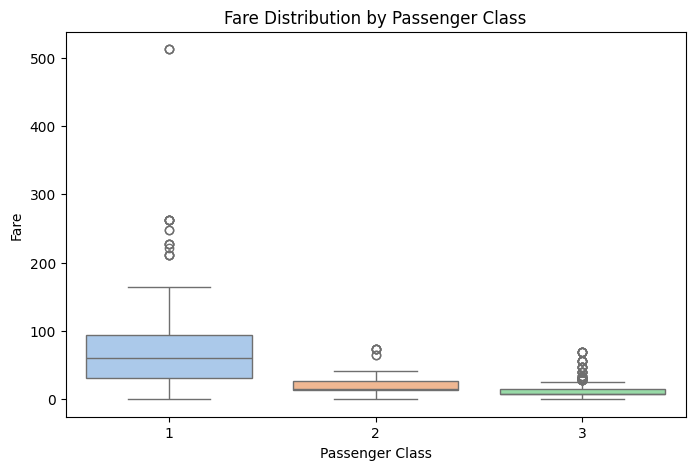

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Fare',data=df,palette='pastel')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()